### Example: There are 30 balls in a bag, 20 red balls and 10 white balls, choose 5 balls randomly from the bag without replacement, if get 4 or more than 4 red balls, you win the game, what is the probability to win the game?

### Solution: There are 2 winning cases: get 4 red balls or get 5 red balls, there are total ${20 \choose 4} {10 \choose 1}+ {20 \choose 5}$ ways to choose, so the probability $P = \frac{{20 \choose 4} {10 \choose 1}+ {20 \choose 5}}  {30 \choose 5}$  

## Hypergeometric Distribution: 
### $m$ red balls, $n$ white balls, choose $r$ balls randomly，what is  the probability of getting $k$ red ball     $P(x = k) = \frac{{m \choose k}{n \choose r-k}}{m+n \choose r}$, where $0\le k \le m$, and $0\le r-k \le n$

## Vandermonde Indentity

### There are m ducans , n peacocks and r top of brances in the forest, how many ways these bird are rest on the top of branch?

### There are 2 ways to think of it, which leads same result, which can be expressed by both side of indentity:
### $m+n \choose r$ = $\sum_{k=0}^{r}{m \choose k}{n \choose r-k}$, 
### divided both side by ${m+n \choose r}$, then we get the sum of the total probability of hypergeometry distribution = 1.

In [82]:
import numpy as np
from scipy.special import comb

In [131]:
bag = list('1') * 20 + list('0') * 10  # 0-19 ‘1’  Red ; 20-29 ‘0’ White
print(bag)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


In [130]:
wins = 0
for i in range(10000):
    ball_index = list(np.random.choice(range(30), 5, replace=False))   # no replacement
    choosen_balls = list(bag[i] for i in ball_index)                   # Find the 5 choose balls
    #print(ball_index,choosen_balls)
    red = list(map(int,choosen_balls))
    total_red = sum(red)
    #print(total_red)
    if total_red > 3:
        wins += 1
        
        
print(f'number of wins: {wins}')
    

number of wins: 4478


In [125]:
(comb(20,4)*comb(10,1)+ comb(20,5))/comb(30,5)

0.4487811039535177

### Example: Fish capture-recapture problem
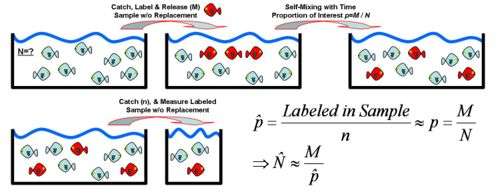

1st catch and label M fish and release, self-mix with time: $p = \frac{M}{N}$, $N$ is total number of fish.
2nd catch $n$ fish without replacement, in which we found the number of fish being labelled $l$,  $\hat p = \frac {l} {n}$ should be close to $p$, in the case $\frac{M}/{N} < 5\%$, hypergeometric can be approximated by binomial, as we know $M$ and $p$, so we can estimate $N$.

### Sample PDF

In [152]:
import matplotlib.pyplot as plt
m = 70
n = 30
r = 20

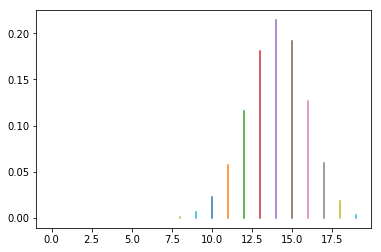

In [154]:
p = []
for k in range(r):

    p.append(comb(m,k)*comb(n,r-k)/comb(m+n, r))
    plt.plot((k,k),(0,p[k]))

## How to increase the probability of luck
### Assume 100 balls, 10 are red, if you get one ball, you win, how many times you need get one ball? Asuming replacement and without replacement. Replacement is Bernoulli process, get the first ball the Geometric Distributed $P(X=k) = q^k p$

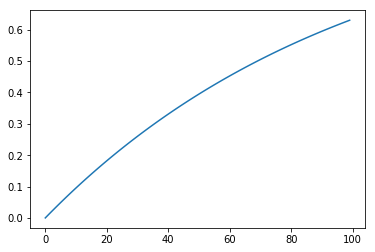

In [239]:
x = list(range(100))
cdf = [1-0.99**i for i in x]
plt.plot(x, cdf )

plt.show()

### PDF: $P(X=k) = q^k*p$,   where $k$ failures, $k \in {[0,1,2,3,\cdots]} $
### CDF:  $F(X=k)= \sum_{i=0}^k q^i*p = p\sum_{i=0}^k q^i = p \frac {1-q^{k+1}}{1-q} = 1-q^{k+1} = 1-(1-p)^{k+1}$
Which can be thought as below: the probability of first success draw is $p$, in which case k=0, equals 1-(1-p); the probability of at least one success in 2 draws equal to 1 - probability of both 1st and 2nd draw are fail, and equal to $1-q^2$, where $k=1$, ... , the probability of at least one success in the n draws then equal to $1-q^n$, where $k=n-1$, which is same as above CDF.

### Without replacement,  hypergeometric  $P(X=k) = \frac {{99\choose k}{1 \choose 1}}  {100 \choose k} =\frac{k}{100} $ , where K is number white balls, the K+1 ball is red ball.

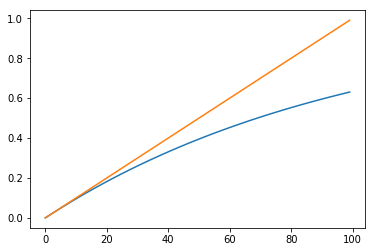

In [243]:
x = list(range(100))
cdf = [1-0.99**i for i in x]
plt.plot(x, cdf )
plt.plot(x, [i/100 for i in x])

plt.show()